Fonction permettant de calculer sur le tirage est dans le cercle et renvoie True si les nombre sont dans le cercle et False sinon:

In [1]:
def est_dans_cercle(a, b, R):
    if (a*a + b*b) <= R**(1/2):
        return True
    else:
        return False

Test de la fonction:

In [2]:
a = 1
b = 0.5
r = 1

resultat = est_dans_cercle(a, b, r)
print(resultat)

False


Calcul de $\pi$ en utilisant une méthode de calul Monte Carlo, c'est à dire basée sur le tirage de nombres aléatoires:

In [3]:
from random import random

surface_cercle = 0
tirages = 10000

for i in range(0, tirages):
    R1 = random()
    R2 = random()

    if est_dans_cercle(R1, R2, 1):
        surface_cercle += 1
print("La valeur de \u03C0 calculée avec %.0f tirages est %f"%(tirages, (4*surface_cercle)/tirages))

La valeur de π calculée avec 10000 tirages est 3.114400


Visualisation de l'amélioration de la détermination de $\pi$ avec le nombre de tirages 

In [5]:
import numpy as np
import time

R1 = np.zeros(tirages)
R2 = np.zeros(tirages)
pi_i_quart=np.zeros(tirages)
err_pi_quart = np.zeros(tirages)
t_calcul_quart = np.zeros(tirages)
start_calcul = time.time()

surface_cercle = 0
# Calcul simple
for i in range(0, tirages):
    R1[i] = random()
    R2[i] = random()

    if est_dans_cercle(R1[i], R2[i], 1):
        surface_cercle += 1
    if i > 0:    
       pi_i_quart[i] = 4*surface_cercle/i
       err_pi_quart[i] = (abs(np.pi-pi_i_quart[i])/np.pi)
       t_calcul_quart[i] = time.time() - start_calcul
    

        

Amélioration de la valeur de $\pi$:


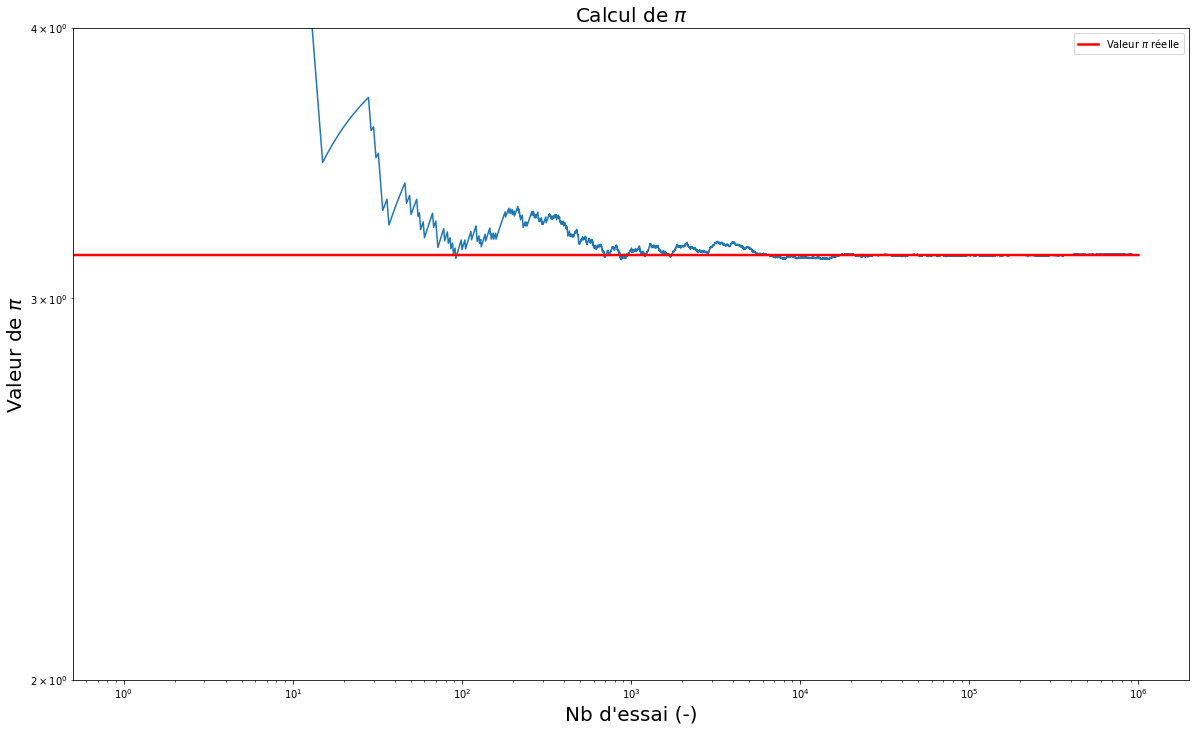

In [6]:
import pylab as pl
import matplotlib.pyplot as plt

x = [i for i in range(tirages)]
PI = [np.pi for i in range(tirages)]

pl.figure(figsize=(20, 12))
plt.plot(x, pi_i_quart)
plt.plot(x, PI, color='red', linewidth=2.5, label="Valeur $\pi$ réelle")
plt.title("Calcul de $\pi$", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Valeur de $\pi$", fontsize=20)
plt.ylim(2,4)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Visualisation de l'amélioration de l'erreur relative par rapport à la valeur réelle de $\pi$ avec des limites à $10^{-4}$ et $10^{-5}$

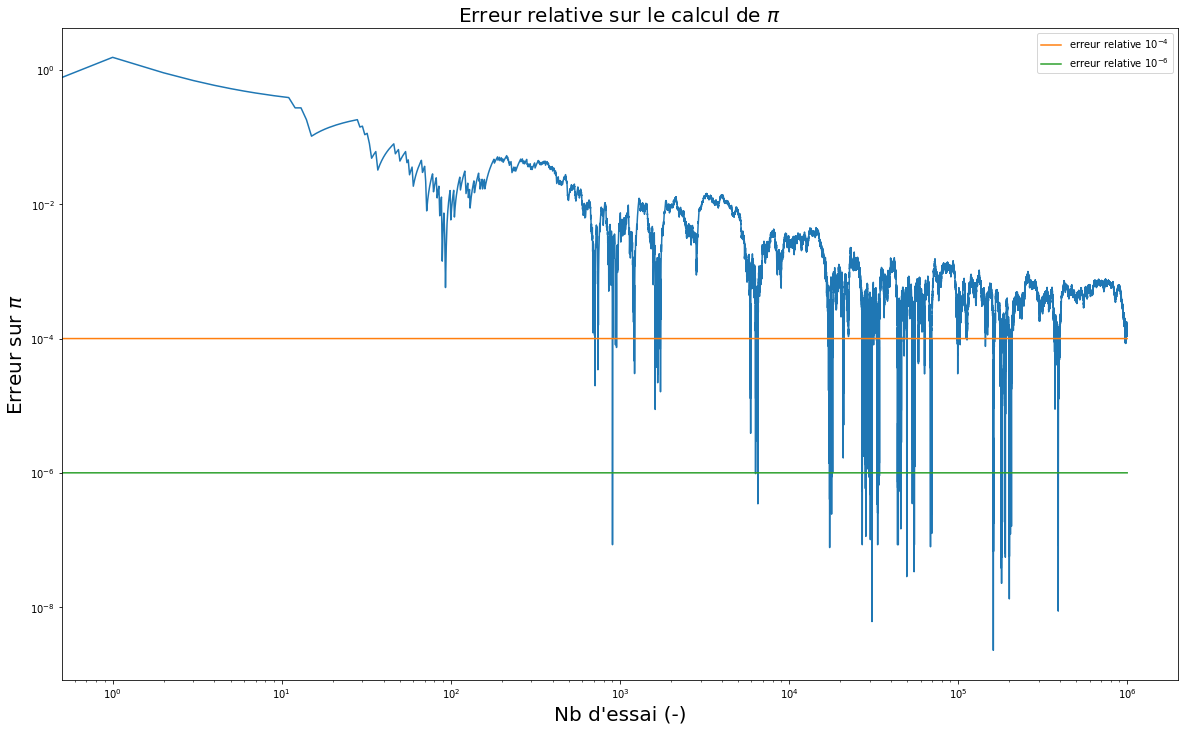

In [8]:
limite_4 = [pow(10, -4) for i in range(tirages)] # limites à 10^{-4}
limite_6 = [pow(10, -6) for i in range(tirages)] # limites à 10^{-6}

pl.figure(figsize=(20, 12))
plt.plot(x, err_pi_quart)
plt.plot(x, limite_4, label="erreur relative $10^{-4}$")
plt.plot(x, limite_6, label="erreur relative $10^{-6}$")
plt.title("Erreur relative sur le calcul de $\pi$", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Erreur sur $\pi$", fontsize=20)
#plt.ylim(0,0.1)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


Temps de calcul

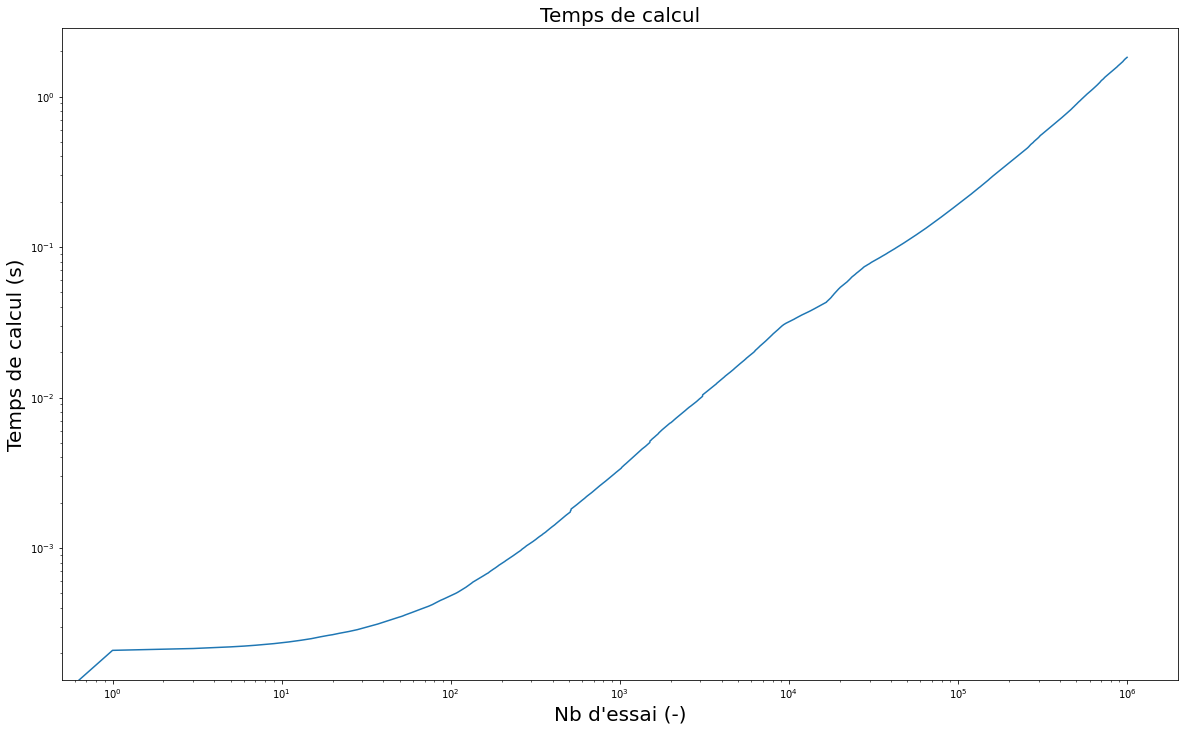

In [9]:
pl.figure(figsize=(20, 12))
plt.plot(x, t_calcul_quart)
plt.title("Temps de calcul", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Temps de calcul (s)", fontsize=20)
plt.yscale("log")
plt.xscale('log')
plt.show()

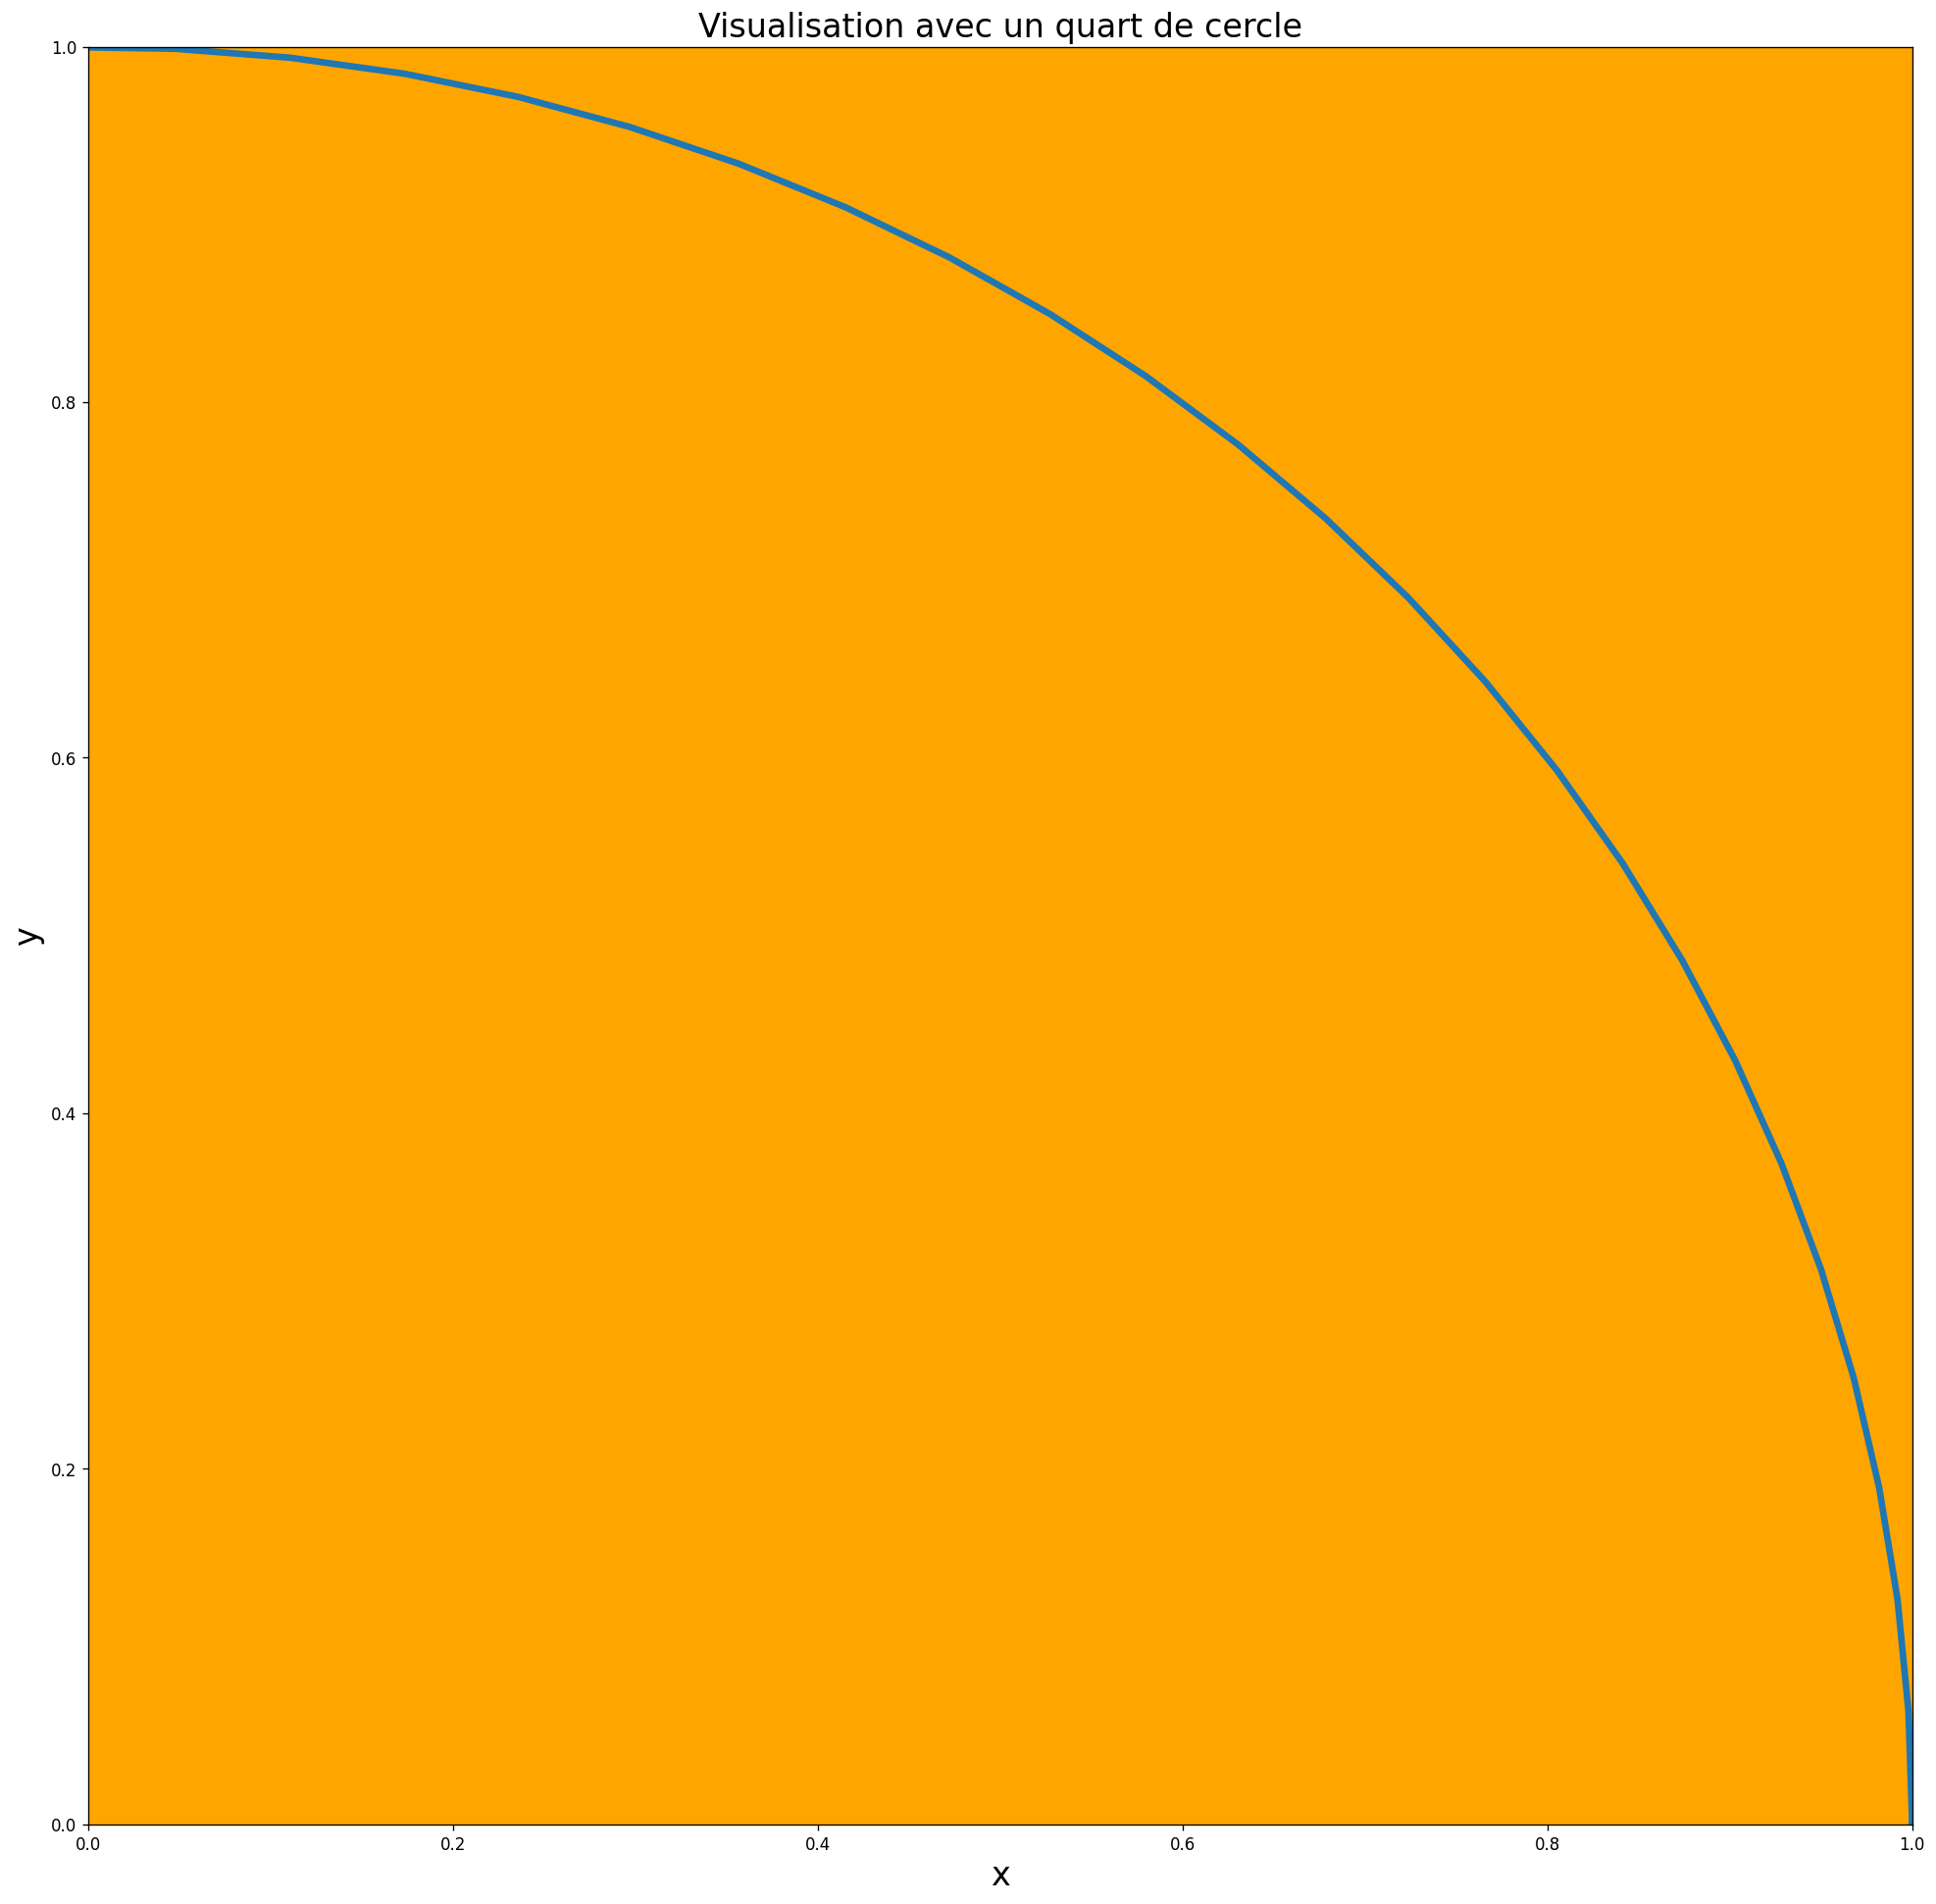

In [12]:
# Calcul du cercle 
theta = np.linspace(0, 2*np.pi, 100)
r = 1
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)


fig = plt.figure(figsize=(20,20),dpi=120)
plt.plot(x1, x2, linewidth=4)
plt.title("Visualisation avec un quart de cercle", fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("x", fontsize=20) 
plt.ylabel("y", fontsize=20)
plt.scatter(R1, R2, color="orange", linewidth=0.2)

